In [1]:
%matplotlib inline

In [2]:
import neurolang
from neurolang import regions
from neurolang import region_solver_ds
from neurolang import frontend
import nibabel as nib
from nilearn import plotting
import os
import operator as op

In [3]:
data_folder = os.environ['HCP_folder']
t1w = nib.load(f'{data_folder}/100206/T1w/T1w_acpc_dc_restore_brain.nii.gz')
parc = nib.load(f'{data_folder}/100206/T1w/aparc.a2009s+aseg.nii.gz')

In [4]:
fe = frontend.RegionFrontend(
    region_solver_ds.RegionSolver(neurolang.neurolang.TypedSymbolTable())
)

In [5]:
fe.load_parcellation(parc, selected_labels='CTX_LH_S_*');

In [6]:
fe.symbols

QuerySymbolsProxy with symbols ['anterior_of', 'inferior_of', 'left_of', 'overlapping', 'posterior_of', 'right_of', 'superior_of', 'regexp', 'region_union', 'CTX_LH_S_CALCARINE', 'CTX_LH_S_CENTRAL', 'CTX_LH_S_CINGUL-MARGINALIS', 'CTX_LH_S_CIRCULAR_INSULA_ANT', 'CTX_LH_S_CIRCULAR_INSULA_INF', 'CTX_LH_S_CIRCULAR_INSULA_SUP', 'CTX_LH_S_COLLAT_TRANSV_ANT', 'CTX_LH_S_COLLAT_TRANSV_POST', 'CTX_LH_S_FRONT_INF', 'CTX_LH_S_FRONT_MIDDLE', 'CTX_LH_S_FRONT_SUP', 'CTX_LH_S_INTERM_PRIM-JENSEN', 'CTX_LH_S_INTRAPARIET_AND_P_TRANS', 'CTX_LH_S_OC_MIDDLE_AND_LUNATUS', 'CTX_LH_S_OC_SUP_AND_TRANSVERSAL', 'CTX_LH_S_OCCIPITAL_ANT', 'CTX_LH_S_OC-TEMP_LAT', 'CTX_LH_S_OC-TEMP_MED_AND_LINGUAL', 'CTX_LH_S_ORBITAL_LATERAL', 'CTX_LH_S_ORBITAL_MED-OLFACT', 'CTX_LH_S_ORBITAL-H_SHAPED', 'CTX_LH_S_PARIETO_OCCIPITAL', 'CTX_LH_S_PERICALLOSAL', 'CTX_LH_S_POSTCENTRAL', 'CTX_LH_S_PRECENTRAL-INF-PART', 'CTX_LH_S_PRECENTRAL-SUP-PART', 'CTX_LH_S_SUBORBITAL', 'CTX_LH_S_SUBPARIETAL', 'CTX_LH_S_TEMPORAL_INF', 'CTX_LH_S_TEMPORAL_S

In [7]:
a = fe.symbols[fe.region_names[0]]
b = fe.symbols[fe.region_names[1]]
b

CTX_LH_S_CENTRAL: <class 'neurolang.regions.Region'> = Region(VBR= affine:[[  -0.69999999    0.            0.           90.        ]
 [   0.            0.69999999    0.         -126.        ]
 [   0.            0.            0.69999999  -72.        ]
 [   0.            0.            0.            1.        ]], voxels:[[143 112 193]
 [143 113 193]
 [143 114 193]
 ..., 
 [220 162 131]
 [220 162 132]
 [220 162 133]])

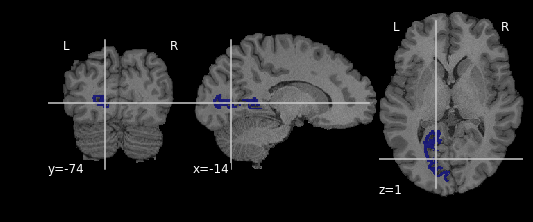

In [8]:
plotting.plot_roi(a.value.spatial_image(), bg_img=t1w)

In [9]:
x = fe.new_region_symbol('x')
query = fe.query(
    x,
    fe.symbols.superior_of(x, a)
    & ~(
        fe.symbols.inferior_of(x, a)
        | fe.symbols.overlapping(x, a)
    )
)
query

{x | ∃x: ( superior_of(x, CTX_LH_S_CALCARINE) ) <built-in function and_> ( <built-in function invert>(( ( inferior_of(x, CTX_LH_S_CALCARINE) ) <built-in function or_> ( overlapping(x, CTX_LH_S_CALCARINE) ) )) )}

In [ ]:
qr = query.do()
qr

In [ ]:
len(qr.value)

In [ ]:
fe.symbols['new_region'] = fe.symbols.region_union(qr).do()

In [ ]:
plotting.plot_roi(fe.symbols.new_region.value.spatial_image(), bg_img=t1w)